<a href="https://colab.research.google.com/github/bholeneha/Text_Classification/blob/Fatima/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings; warnings.simplefilter('ignore')

# New Section

In [3]:
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import regex
#from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
names = []
base = 'sample_data/Data/'
with os.scandir(base) as entries:
    for entry in entries:
        if(entry.is_file() == False):
            names.append(entry.name)

try:
  names.remove(".ipynb_checkpoints")
except:
  pass
names

['Crime', 'Science', 'Politics', 'Entertainment']

In [5]:
files = {}
unique = []
for name in names:
    path = base + name+'/'
    x = []
    with os.scandir(path) as entries:
        for entry in entries:
            if(entry.is_file()):
                x.append(entry.name)
    files[name] = x
    files[name].sort()

In [6]:
for k, v in files.items():
    print(k, len(v))

Crime 130
Science 130
Politics 130
Entertainment 130


In [10]:
for i in range(len(names)):
    x = files[names[i]]
    for j in x:
        for k in range(i+1, len(names)):
            key = names[k]
            if j in files[key]:
                files[key].remove(j)

In [11]:
for k, v in files.items():
    print(k, len(v))

Crime 130
Science 0
Politics 130
Entertainment 0


In [12]:
data_LDA = {}
i = 0

for genre in files.keys() :
    texts = files[genre]
    for text in texts:
        if text in files[genre]:
            path = base + genre + '/' + text
            with open(path, "r", encoding = "latin1") as file:
                data_LDA[i] = file.readlines()
                i = i+1
            data_LDA[i-1] = [" ".join(data_LDA[i-1]), genre] 

data_LDA = pd.DataFrame(data_LDA).T
print(data_LDA.shape)
data_LDA.columns = ['Text', 'Class']
data_LDA.head()

(260, 2)


,Text,Class
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime
4,\n Some sick part of me really liked that p...,Crime


In [14]:
data_LDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    260 non-null    object
 1   Class   260 non-null    object
dtypes: object(2)
memory usage: 6.1+ KB


In [16]:
unique = list(data_LDA.Text.unique())
len(unique)

259

In [17]:
dic = dict(data_LDA)

In [18]:
uni = {}
i = 0
for k in range(len(list(dic['Text']))):
    if dic['Text'][k] in unique:
        uni[i] = [dic['Text'][k], dic['Class'][k]]
        unique.remove(dic['Text'][k])
        i += 1

In [19]:
data_LDA = pd.DataFrame(uni).T
print(data_LDA.shape)
data_LDA.columns = ['Text', 'Class']
data_LDA.head()

(259, 2)


,Text,Class
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime
4,\n Some sick part of me really liked that p...,Crime


In [20]:
def make_wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="white").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()

In [21]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha() and len(w) > 3]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

In [22]:
data_LDA["filtered_text"] = data_LDA.Text.apply(lambda x : filter_text(x, stop)) 
data_LDA.head()

,Text,Class,filtered_text
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime,archive name ripem last update post still rath...
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,approve news answer request content type text ...
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime,approve news answer request content type text ...
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime,message bilbo suite reply miller suite nntp po...
4,\n Some sick part of me really liked that p...,Crime,sick part really like phrase actually merely t...


In [24]:
#list(set(data["filtered_text"][0].split(" ")))

#word_list = [text.split(" ") for text in data["filtered_text"]]

word_list = []
for text in data_LDA["filtered_text"]:
    temp = text.split(" ")
    word_list.append(temp)
    
    # for word in temp:
  #     if word not in word_list:
   #        word_list.append(word)
    
print(word_list)

[['archive', 'name', 'ripem', 'last', 'update', 'post', 'still', 'rather', 'rough', 'list', 'likely', 'question', 'information', 'ripem', 'program', 'public', 'mail', 'encryption', 'ripem', 'write', 'maintain', 'marc', 'vanheyningen', 'mvanheyn', 'whale', 'indiana', 'post', 'variety', 'newsgroups', 'monthly', 'basis', 'follow', 'discussion', 'specific', 'ripem', 'redirect', 'group', 'security', 'ripem', 'month', 'reformatted', 'post', 'attempt', 'comply', 'standards', 'hypertext', 'format', 'allow', 'easy', 'manipulation', 'document', 'world', 'wide', 'know', 'think', 'disclaimer', 'nothing', 'consider', 'legal', 'advice', 'anything', 'person', 'opinion', 'want', 'real', 'legal', 'advice', 'talk', 'real', 'lawyer', 'question', 'answer', 'ripem', 'ripem', 'program', 'perform', 'privacy', 'enhance', 'mail', 'use', 'cryptographic', 'techniques', 'allow', 'electronic', 'mail', 'properties', 'authentication', 'send', 'confirm', 'privacy', 'nobody', 'read', 'except', 'intend', 'recipient', '

In [25]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim.corpora as corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
type(word_list[0])

list

In [26]:
# Create Dictionary 
id2word = corpora.Dictionary(word_list)

#print(id2word)

#dictionary = corpora.Dictionary([tokens])
#  print(dictionary)
    
# Create Corpus
texts = word_list

# Term Document Frequency
#corpus = id2word.doc2bow([word_list])
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus)

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 2), (10, 2), (11, 7), (12, 2), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 3), (31, 2), (32, 3), (33, 4), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 2), (48, 5), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 3), (59, 3), (60, 1), (61, 1), (62, 1), (63, 3), (64, 3), (65, 1), (66, 1), (67, 4), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 4), (79, 3), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 3), (92, 2), (93, 4), (94, 2), (95, 5), (96, 4), (97, 1), (98, 1), (99, 1), (100, 1), (101, 5), (102, 1), (103, 2), (104, 2), (105, 1), (106, 1), (107, 1), (108, 2), (109, 2), (110, 1)

In [27]:
###training LDA model

from pprint import pprint
# number of topics
num_topics = 4
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"post" + 0.005*"would" + 0.005*"use" + 0.005*"write" + '
  '0.004*"anonymous" + 0.004*"make" + 0.004*"encryption" + 0.003*"people" + '
  '0.003*"know" + 0.003*"privacy"'),
 (1,
  '0.006*"would" + 0.005*"use" + 0.005*"public" + 0.005*"encryption" + '
  '0.005*"people" + 0.005*"write" + 0.004*"make" + 0.004*"message" + '
  '0.004*"post" + 0.003*"data"'),
 (2,
  '0.008*"encryption" + 0.005*"privacy" + 0.005*"use" + 0.004*"security" + '
  '0.004*"government" + 0.004*"post" + 0.004*"make" + 0.004*"time" + '
  '0.004*"would" + 0.004*"write"'),
 (3,
  '0.006*"right" + 0.005*"public" + 0.004*"would" + 0.004*"information" + '
  '0.004*"privacy" + 0.004*"people" + 0.004*"use" + 0.004*"encryption" + '
  '0.004*"post" + 0.004*"message"')]


In [28]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 5.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=e3d737f7f3c53ebef7aa896368869ff877956cf72a0c48d75970c148d214370d
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [29]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.007686 -0.014402       1        1  32.973815
2      0.002607  0.003127       2        1  32.629529
3      0.007933  0.011776       3        1  22.072553
0     -0.018226 -0.000501       4        1  12.324103, topic_info=            Term        Freq       Total Category  logprob  loglift
302         post  284.000000  284.000000  Default  30.0000  30.0000
616        would  321.000000  321.000000  Default  29.0000  29.0000
15     anonymous  197.000000  197.000000  Default  28.0000  28.0000
574        right  223.000000  223.000000  Default  27.0000  27.0000
445        write  265.000000  265.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
186  information   20.189906  205.326752   Topic4  -5.9877  -0.2258
163   government   19.908168  207.284918   Topic4  -6.0017  -0.2494
352        ripem   17.245258  138.378806   Topic4  -6.1453   0.0112
317       public   19.879846  248.856630   Topic4  -6.0032  -0.4336
13          also   17.584743  160.752483   Topic4  -6.1258  -0.1192

[376 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         1  0.311431   access
2         2  0.407826   access
2         3  0.185375   access
2         4  0.096395   access
6930      1  0.549828  acronym
...     ...       ...      ...
616       4  0.136947    would
445       1  0.369710    write
445       2  0.286714    write
445       3  0.196173    write
445       4  0.150902    write

[779 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [ ]:
#### Useful insights into the data set by constructing wordclouds and find term frequencies in each topic (Topic=4)

In [30]:

from wordcloud import WordCloud

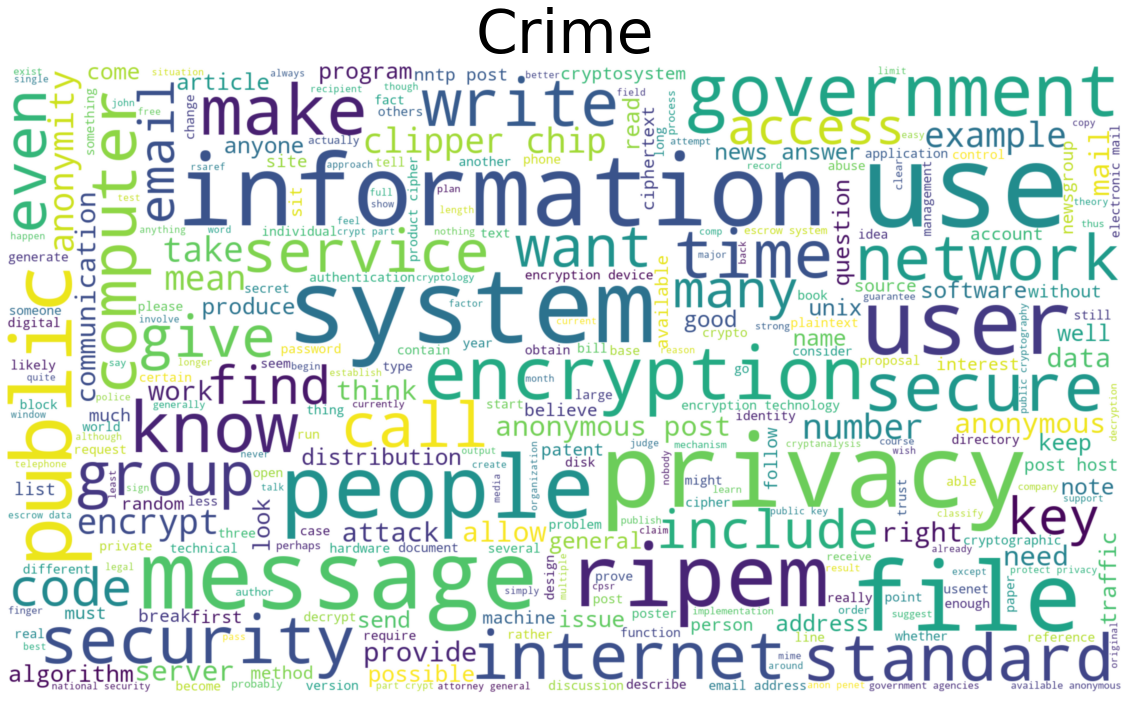

In [31]:
all_text = " ".join(data_LDA[data_LDA.Class == "Crime"].filtered_text) 
make_wordcloud(all_text, "Crime")

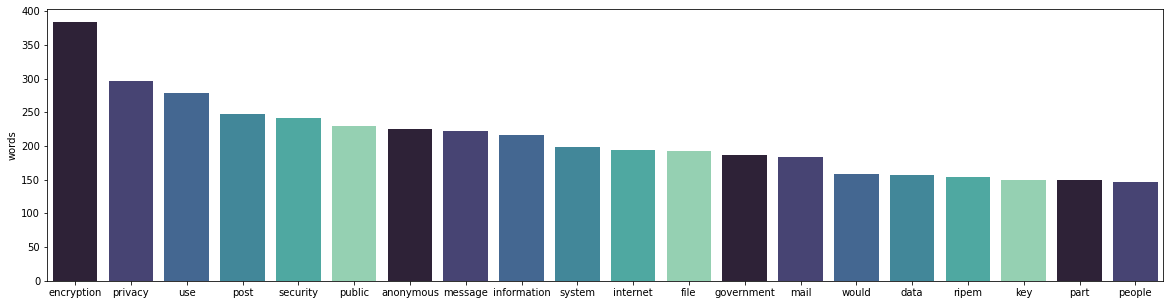

In [32]:
count = pd.DataFrame(all_text.split(), columns = ['words'])
top_10 = count[count['words'].isin(list(count.words.value_counts()[:20].index[:20]))]
plt.figure(figsize=(20,5))
sns.barplot(x = top_10.words.value_counts().index,
            y = top_10.words.value_counts(), palette = sns.color_palette("mako"))

In [ ]:
###Applying NNs to individual classes and for that first we create seperate data frames for each class
#import pandas as pd
#df = pd.read_csv('file_location\filename.txt', delimiter = "\t")

In [34]:
files = {}
unique = []
for name in names:
    path = base + name+'/'
    x = []
    with os.scandir(path) as entries:
        for entry in entries:
            if(entry.is_file()):
                x.append(entry.name)
    files[name] = x
    files[name].sort()

In [35]:
for k, v in files.items():
    print(k, len(v))

Crime 130
Science 130
Politics 130
Entertainment 130


In [36]:
data = {}
i = 0

for genre in files.keys() :
    texts = files[genre]
    for text in texts:
        if text in files[genre]:
            path = base + genre + '/' + text
            with open(path, "r", encoding = "latin1") as file:
                data[i] = file.readlines()
                i = i+1
            data[i-1] = [" ".join(data[i-1]), genre] 
#data
data = pd.DataFrame(data).T
print(data.shape)
data.columns = ['Text', 'Class']
data

(520, 2)


,Text,Class
0,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Crime
1,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
2,Approved: news-answers-request@MIT.EDU\n Conte...,Crime
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Crime
4,\n Some sick part of me really liked that p...,Crime
...,...,...
515,\n In article <1qnmnp$db8@sol.TIS.COM> mjr@tis...,Entertainment
516,Distribution: inet\n Message-ID: <1qoapv$9rn@l...,Entertainment
517,NNTP-Posting-Host: sayshell.umd.edu\n \n In ar...,Entertainment
518,\n In article <1993Apr16.165423.27204@linus.mi...,Entertainment


In [37]:
data["Class"].unique()

array(['Crime', 'Science', 'Politics', 'Entertainment'], dtype=object)

In [38]:
### Develop four seperate dataframes
crime_df=data.loc[data['Class']=="Crime"]
politics_df=data.loc[data['Class']=="Politics"]
science_df=data.loc[data['Class']=="Science"]
entertainment_df=data.loc[data['Class']=="Entertainment"]

In [39]:
#CHECKING ENTERTAINMENT dataframe
entertainment_df

,Text,Class
390,"\n Archive-name: ripem/faq\n Last-update: Sun,...",Entertainment
391,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
392,Approved: news-answers-request@MIT.EDU\n Conte...,Entertainment
393,Message-ID: <1ppvai$l79@bilbo.suite.com>\n Rep...,Entertainment
394,\n Some sick part of me really liked that p...,Entertainment
...,...,...
515,\n In article <1qnmnp$db8@sol.TIS.COM> mjr@tis...,Entertainment
516,Distribution: inet\n Message-ID: <1qoapv$9rn@l...,Entertainment
517,NNTP-Posting-Host: sayshell.umd.edu\n \n In ar...,Entertainment
518,\n In article <1993Apr16.165423.27204@linus.mi...,Entertainment
